# **Trivariate Standardized Drought Index (TSDI)**
**Tolga Barış Terzi – 2025**

This notebook demonstrates example calculations of the **Trivariate Standardized Drought Index (TSDI)**.  

TSDI is a **standardized drought index** that can handle **non-normally distributed hydrometeorological variables** by using **empirical cumulative distribution functions (CDFs)** instead of assuming any parametric distribution.  

PyDRGHT supports TSDI calculation using either:

- **Gringorten plotting position**
- **Weibull plotting position**

for empirical CDF estimation.

---

## **TSDI Methodology Overview**

1. **Aggregation**: Accumulate the variable of interest (e.g., precipitation, soil moisture, runoff) over the selected time scale (e.g., 1, 3, 6, 12 months).  

2. **Empirical Standardization**:  
   - Compute the **empirical CDF** of the aggregated values for each calendar month using a chosen plotting position formula (`Gringorten` or `Weibull`).  
   - Transform the CDF to a **standard normal index** using:  

     $$
     \text{TSDI} = \Phi^{-1}(F_\text{empirical}(X))
     $$  

3. **Interpretation**:  
   - Negative TSDI values → **Drought conditions**  
   - Positive TSDI values → **Wet conditions**  

---

## **Required Packages**


In [3]:
import pandas as pd
import numpy as np
import pydrght
import xarray as xr # if using NetCDF / raster data 

---
## **Load the Data**

The example dataset contains monthly values of:
  
- **Precipitation** 
- **Streamflow**
- **Soil moisture**

In [4]:
df = pd.read_csv("data.csv", index_col=0, parse_dates=True)
display(df.head())

ds = xr.open_dataset("soilmoisture.nc4")
display(ds.head())

,STREAMFLOW,PRECIPITATION,MINT,MAXT,MEANT,PET
DATE,,,,,,
1964-10-01,10.5,46.67,2.0,22.7,12.0,95.471
1964-11-01,11.0,99.70,-1.7,12.3,5.0,43.318
1964-12-01,12.5,64.70,-4.1,4.1,-0.4,22.320
1965-01-01,12.3,41.00,-5.0,3.0,-1.4,22.607
1965-02-01,15.8,104.50,-6.9,3.4,-2.1,29.121


<xarray.Dataset> Size: 176B
Dimensions:               (time: 5, lat: 1, lon: 1)
Coordinates:
  * time                  (time) datetime64[ns] 40B 1948-01-01 ... 1948-05-01
  * lat                   (lat) float64 8B 36.5
  * lon                   (lon) float64 8B 29.5
Data variables:
    SoilMoi0_10cm_inst    (time, lat, lon) float64 40B ...
    SoilMoi10_40cm_inst   (time, lat, lon) float64 40B ...
    SoilMoi40_100cm_inst  (time, lat, lon) float64 40B ...

---
## **Calculate TSDI**

In this example, we calculate monthly **TSDI** values using precipitation, streamflow and soil moisture data.  

- **Precipitation, streamflow and soil moisture** are selected from the datasets.  

We use the `pydrght.TSDI` class to calculate:  

1. **TSDI**: Trivariate Standardized Drought Index


=== Trivariate Standardized Drought Index (TSDI) ===


0   -0.689256
1   -0.605772
2   -0.672444
3   -0.303522
4    0.360964
dtype: float64

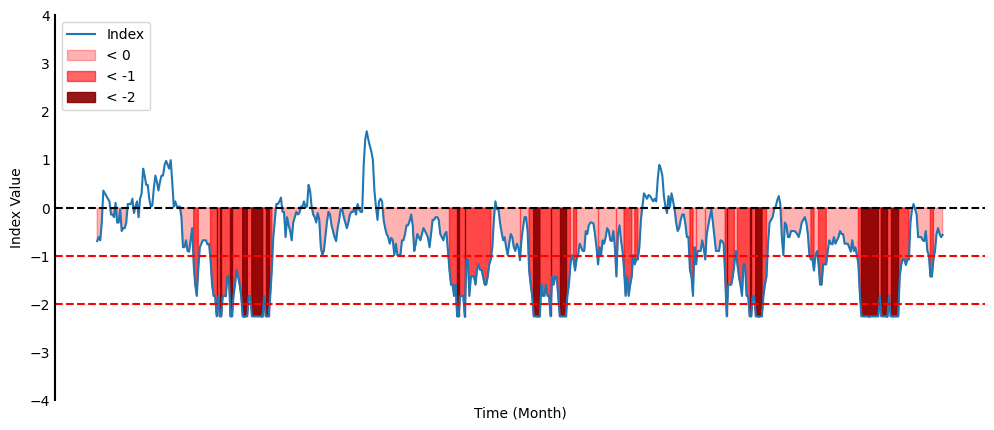

In [ ]:
from pydrght import TSDI

# Select the data
precip = df['PRECIPITATION'].dropna()
streamflow = df['STREAMFLOW'].dropna()
soil_moisture = ds['SoilMoi0_10cm_inst'].sel(lat=36.5, lon=29.5).to_series()
soil_moisture.dropna(inplace=True)

# Align the soil moisture data with streamflow data as they need to be the same length
soil_moisture_aligned = soil_moisture.loc[soil_moisture.index.isin(streamflow.index)]


# Initialize TSDI class
tsdi = TSDI(precip, streamflow, soil_moisture_aligned, ts=12)

# === Trivariate Standardized Drought Index (TSDI) ===
TSDI_values = tsdi.empirical()
print("=== Trivariate Standardized Drought Index (TSDI) ===")
display(TSDI_values.head())

pydrght.utils.plot_index_with_severity(TSDI_values)

---


## **References**

- Zhang, Y., Huang, S., Huang, Q., Leng, G., Wang, H., Wang, L., 2019. *Assessment of drought evolution characteristics based on a nonparametric and trivariate integrated drought index.* Journal of Hydrology 579, 124230.
---
